In [1]:
# 
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.available
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False   

def improve_legend(ax=None, xloc=-1, yloc=-1):
    if ax is None: ax = plt.gca()
   #  for spine in ax.spines: ax.spines[spine].set_visible(False)

    for line in ax.lines:
        data_x, data_y = line.get_data()
        right_most_x = data_x[xloc]
        right_most_y = data_y[yloc]
        ax.annotate(line.get_label(), xy=(right_most_x, right_most_y), xytext=(5, 10),
         textcoords="offset points", va="center", color=line.get_color(), size=24
        )
    ax.legend().set_visible(False)

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

In [2]:
# read_excel() 함수로 데이터프레임 변환 
df101 = pd.read_excel('./data/101.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df102 = pd.read_excel('./data/102.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df103 = pd.read_excel('./data/103.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df106 = pd.read_excel('./data/106.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df107 = pd.read_excel('./data/107.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df109 = pd.read_excel('./data/109.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df201 = pd.read_excel('./data/201.xlsx', engine='openpyxl')            # header=0 (default 옵션)

# 데이터프레임 출력
print(df101)
print('\n')

                                          가정별   성별       연령별      1970  \
0   중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위)   전체         계  32240827   
1                                         NaN  NaN    0 - 4세   4548177   
2                                         NaN  NaN    5 - 9세   4629882   
3                                         NaN  NaN  10 - 14세   4531308   
4                                         NaN  NaN  15 - 19세   3269356   
..                                        ...  ...       ...       ...   
64                                        NaN  NaN  80 - 84세         -   
65                                        NaN  NaN  85 - 89세         -   
66                                        NaN  NaN  90 - 94세         -   
67                                        NaN  NaN  95 - 99세         -   
68                                        NaN  NaN   100세 이상         -   

        1971      1972      1973      1974      1975      1976  ...      2041  \
0   32882704  33505406  341031

In [3]:
#102 
df102.info
df102_i = df102.iloc[:,1:]
df102_i = df102_i.set_index('인구구조,부양비별')
df102_i
#103 
df103.info
df103_i = df103.iloc[:,1:]
df103_i = df103_i.set_index('인구종류별')
df103_i
#106
df106.info
df106_i = df106.iloc[:,1:]
df106_i = df106_i.set_index('연령별')
df106_i
df106_i2 = df106_i.iloc[1:,:]
df106_i2
#107 
df107.info
df107_i = df107.iloc[:,1:]
df107_i = df107_i.set_index('성별')
df107_i
#109
df109.info
df109_i = df109.iloc[:,1:]
df109_i
#201
df201.info
df201_i = df201.iloc[:,1:]
df201_i

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,시도별,성별,연령별,항목,단위,1970 년,1971 년,1972 년,1973 년,1974 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
1,전국,계,계,추계인구,NaN,32240827,32882704,33505406,34103149,34692266,...,49998451,49784159,49551362,49300187,49029906,48739019,48426874,48093212,47737283,47358532
2,전국,계,0 - 4세,추계인구,NaN,4548177,4619581,4675505,4695313,4689282,...,1481234,1450073,1423957,1402367,1384085,1367366,1350238,1330826,1307620,1279698
3,전국,계,5 - 9세,추계인구,NaN,4629882,4524871,4457446,4413524,4422587,...,1579610,1580535,1567566,1543017,1509181,1473543,1442717,1416884,1395531,1377451
4,전국,계,10 - 14세,추계인구,NaN,4531308,4619637,4725521,4740548,4678202,...,1403436,1453444,1496689,1532713,1561587,1578472,1579396,1566512,1542105,1508441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,제주특별자치도,여자,80 - 84세,추계인구,NaN,NaN,NaN,NaN,NaN,NaN,...,21419,22236,23113,23224,23074,23106,23078,23217,24332,25103
1239,제주특별자치도,여자,85 - 89세,추계인구,NaN,NaN,NaN,NaN,NaN,NaN,...,13176,14167,15217,16452,17418,18535,19255,20016,20106,20006
1240,제주특별자치도,여자,90 - 94세,추계인구,NaN,NaN,NaN,NaN,NaN,NaN,...,6873,7065,7325,7611,8545,9348,10068,10824,11703,12472
1241,제주특별자치도,여자,95 - 99세,추계인구,NaN,NaN,NaN,NaN,NaN,NaN,...,2663,2807,2976,3127,3255,3371,3494,3660,3826,4356


In [4]:
# 
df101.head()
df101.columns
len(df101.columns)
df101.index
len(df101.index)
df101.info

<bound method DataFrame.info of                                           가정별   성별       연령별      1970  \
0   중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위)   전체         계  32240827   
1                                         NaN  NaN    0 - 4세   4548177   
2                                         NaN  NaN    5 - 9세   4629882   
3                                         NaN  NaN  10 - 14세   4531308   
4                                         NaN  NaN  15 - 19세   3269356   
..                                        ...  ...       ...       ...   
64                                        NaN  NaN  80 - 84세         -   
65                                        NaN  NaN  85 - 89세         -   
66                                        NaN  NaN  90 - 94세         -   
67                                        NaN  NaN  95 - 99세         -   
68                                        NaN  NaN   100세 이상         -   

        1971      1972      1973      1974      1975      1976  ...      2041  

In [5]:
# 
df101.isnull()
df101.isnull().sum(axis=0)
df101.notnull()

,가정별,성별,연령별,1970,1971,1972,1973,1974,1975,1976,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
65,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
66,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
67,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
# 
# df101['가정별'].value_counts(dropna=False)
df101.iloc[:,0].value_counts(dropna=False)
df101.iloc[:,1].value_counts(dropna=False)

NaN    66
전체      1
남자      1
여자      1
Name: 성별, dtype: int64

In [7]:
# 어떻게 하면 특정 원소의 위치정보를 간단하게 확인할 수 있을까?
for i in range(0, len(df101.index)):
    # if pd.isna(row):
    if pd.notnull(df101.iloc[i,1]):
        print(i,': ', df101.iloc[i,1])    # second column

0 :  전체
23 :  남자
46 :  여자


In [8]:
# 
df101_people = df101.iloc[0:18,2:]
df101_people['number'] = df101_people.index
df101_people_i = df101_people.set_index('연령별')
# df101_men_i = df101_men.reset_index()
df101_people_i

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,number
연령별,,,,,,,,,,,,,,,,,,,,,
계,32240827,32882704,33505406,34103149,34692266,35280725,35848523,36411795,36969185,37534236,...,49784159,49551362,49300187,49029906,48739019,48426874,48093212,47737283,47358532,0
0 - 4세,4548177,4619581,4675505,4695313,4689282,4541059,4380101,4222842,4107110,4025181,...,1450073,1423957,1402367,1384085,1367366,1350238,1330826,1307620,1279698,1
5 - 9세,4629882,4524871,4457446,4413524,4422587,4478159,4540577,4611679,4626835,4584686,...,1580535,1567566,1543017,1509181,1473543,1442717,1416884,1395531,1377451,2
10 - 14세,4531308,4619637,4725521,4740548,4678202,4595185,4514152,4438586,4382084,4395448,...,1453444,1496689,1532713,1561587,1578472,1579396,1566512,1542105,1508441,3
15 - 19세,3269356,3499916,3723447,3960106,4174551,4334269,4455008,4546786,4604018,4587525,...,1222274,1252075,1304208,1364530,1420079,1469824,1512836,1548664,1577377,4
20 - 24세,2569044,2640975,2729488,2780387,2874517,3074414,3336525,3544548,3743774,3936519,...,1600703,1499718,1415309,1361544,1340184,1344305,1373941,1425608,1485315,5
25 - 29세,2335969,2297759,2309954,2378425,2458215,2535266,2588407,2647963,2727306,2862241,...,2345432,2232853,2119978,1970376,1814032,1688201,1586719,1501901,1447776,6
30 - 34세,2237747,2268991,2306035,2296469,2277514,2245682,2236634,2278218,2355958,2446500,...,2514604,2493672,2478345,2477185,2428060,2344222,2231336,2118083,1968061,7
35 - 39세,1866982,1948564,2029069,2108309,2166022,2209126,2251043,2293446,2310640,2300125,...,2448294,2455277,2430950,2430706,2474295,2489791,2469014,2453745,2452622,8


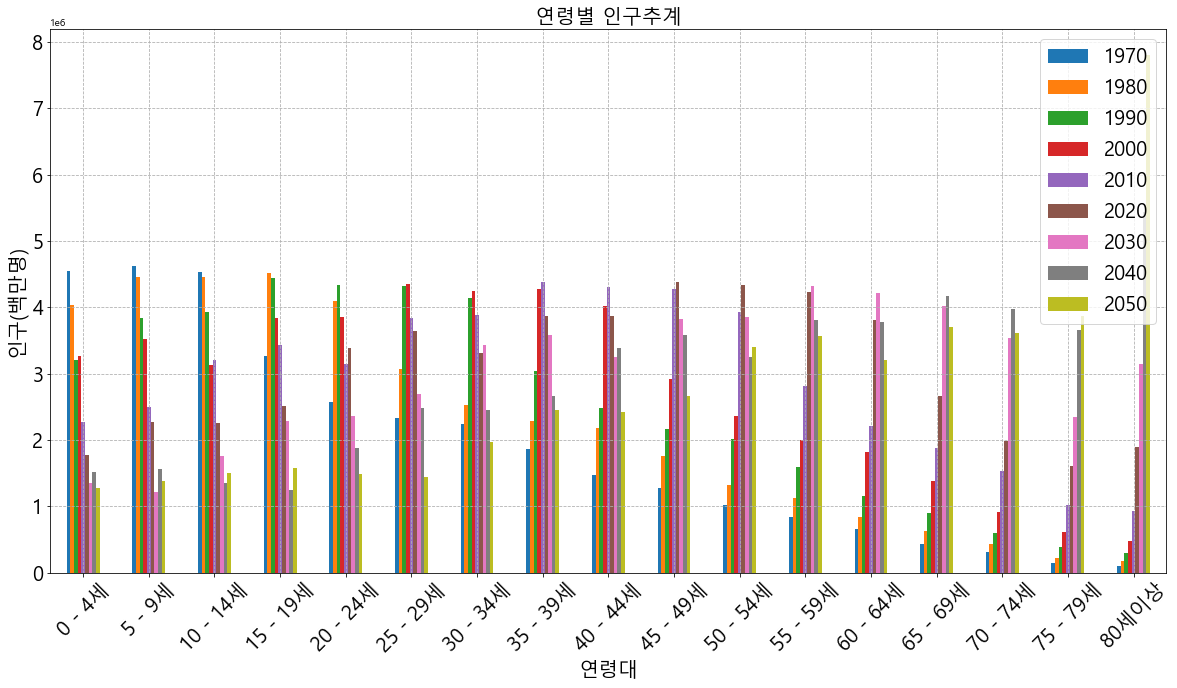

In [9]:
# 
#101 전체 bar

df101_people_i.iloc[1:,:-1:10].plot(kind='bar', stacked=False, alpha=1.0, figsize=(20,10),
                            #    color=['red', 'yellow', 'blue', 'white', 'black'])
                            #    color=['#ff0000', '#777700', '#00ff00', '#007777', '#0000ff'])
                               color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])

plt.title('연령별 인구추계', size=20)
plt.ylabel('인구(백만명)', size=20)
plt.xlabel('연령대', size=20)
plt.legend(loc='best', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.grid(True, linestyle='--')
# plt.show()

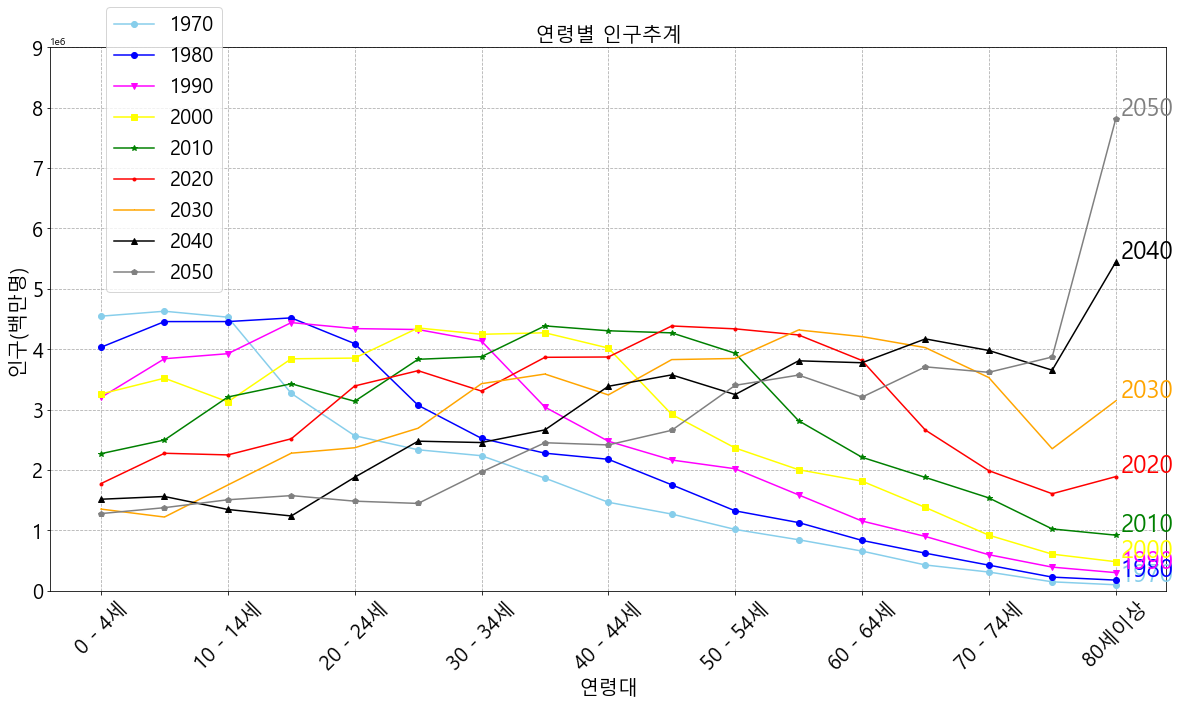

In [10]:
#101 전체 line
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

df101_people_i.iloc[1:,0].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='-', color='skyblue')
df101_people_i.iloc[1:,10].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='-', color='blue')
df101_people_i.iloc[1:,20].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'v', linestyle='-', color='#ff00ff')
df101_people_i.iloc[1:,30].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 's', linestyle='-', color='yellow')
df101_people_i.iloc[1:,40].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = '*', linestyle='-', color='green')
df101_people_i.iloc[1:,50].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = '.', linestyle='-', color='red')
df101_people_i.iloc[1:,60].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = ',', linestyle='-', color='orange')
df101_people_i.iloc[1:,70].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = '^', linestyle='-', color='black')
df101_people_i.iloc[1:,80].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'p', linestyle='-', color='gray')
improve_legend(axes)                                
plt.title('연령별 인구추계', size=20)
plt.ylabel('인구(백만명)', size=20)
plt.xlabel('연령대', size=20)
plt.legend(loc=(0.05, 0.55), fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.ylim(0, 9000000)
plt.grid(True, linestyle='--')
# fig.suptitle('전체 제목', fontsize=20)

In [11]:
#101 전체 3D
z = df101_people_i.iloc[1:,:-1]
z = df101_people_i.sort_values(by=['number'], ascending=False)
z = df101_people_i.sort_values(by=['number'], ascending=False).iloc[0:-1,:-1]
y= z.index
x = df101_people_i.columns
t = np.linspace(0, 10, 50)
fig= go.Figure(data=[go.Surface(x=x, y=y, z=z.values)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
   title='연령별 인구추계', autosize=False,
   width=600,height=600,
   scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
   scene = {
      "xaxis": {"nticks": 11},
      "yaxis": {"nticks": 10},
      "zaxis": {"nticks": 10},
   },   
   updatemenus=[dict(type='buttons', showactive=False, y=1,x=0.8,
      xanchor='left', yanchor='bottom',
      pad=dict(t=45, r=10),
      buttons=[dict(label='Play',method='animate',
         args=[None, dict(frame=dict(duration=200, redraw=True), 
            transition=dict(duration=0), fromcurrent=True, mode='immediate')])])]
)

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames
fig.show()

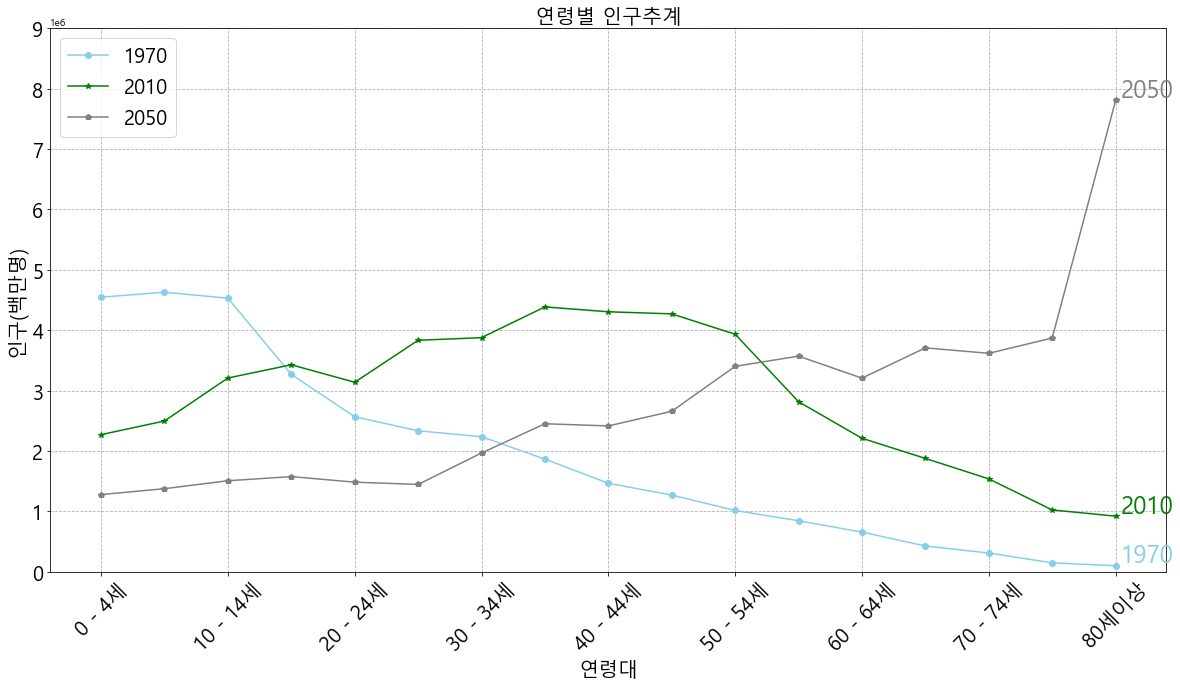

In [12]:
#101 연령별 전체 인구 3개년
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

df101_people_i.iloc[1:,0].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='-', color='skyblue')
df101_people_i.iloc[1:,40].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = '*', linestyle='-', color='green')
df101_people_i.iloc[1:,80].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'p', linestyle='-', color='gray')

improve_legend(axes)
plt.title('연령별 인구추계', size=20)
plt.ylabel('인구(백만명)', size=20)
plt.xlabel('연령대', size=20)
plt.legend(loc='best', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.ylim(0, 9000000)
plt.grid(True, linestyle='--')
# fig.suptitle('전체 제목', fontsize=20)

Text(0.5, 0.98, '총인구 및 인구성장률')

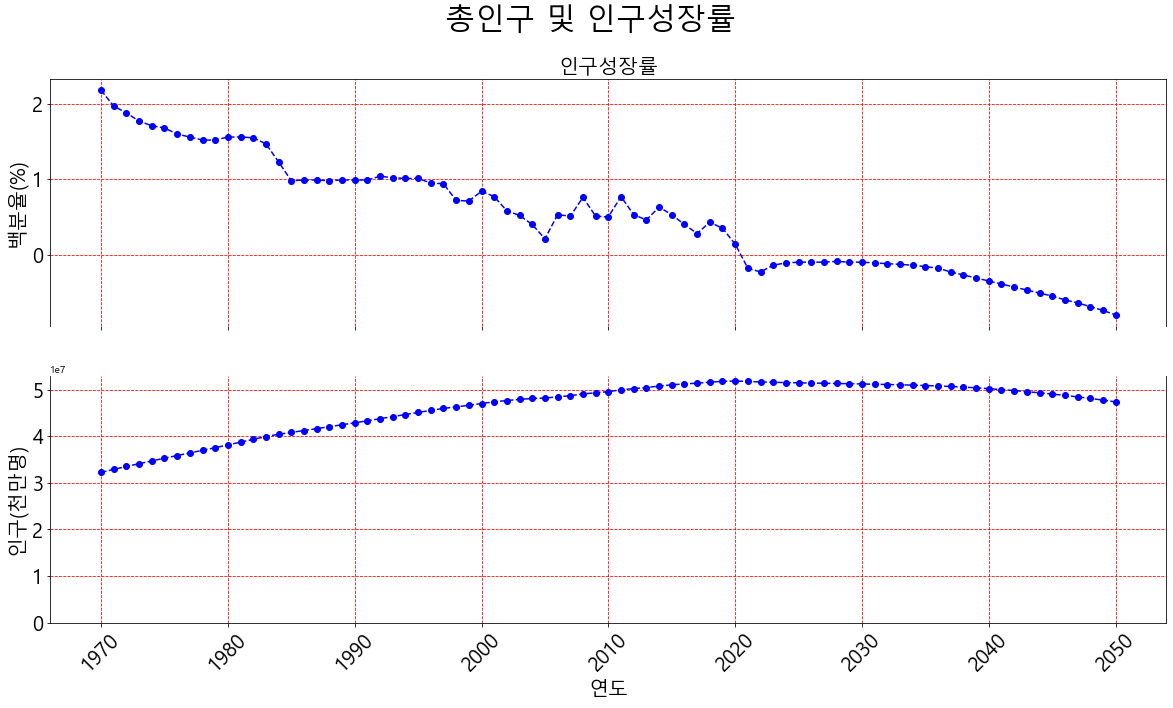

In [13]:
#102 인구성장률, 전체 인구
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))

df102_i.loc['인구성장률'].plot(ax=axes[0], kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='--', color='blue')
axes[0].grid(True, axis='x', color='red', linestyle='--')
axes[0].grid(True, axis='y', color='red', linestyle='--')
axes[0].set_ylabel('백분율(%)', size=20)
axes[0].set_title('인구성장률', size=20)
axes[0].tick_params(axis='x', which='major', labelsize=20, rotation = 45, labelbottom=False)
axes[0].tick_params(axis='y', which='major', labelsize=20)
axes[0].spines['bottom'].set_visible(False)

df101_people_i.iloc[0,:-1].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='--', color='blue')
axes[1].grid(True, axis='x', color='red', linestyle='--')
axes[1].grid(True, axis='y', color='red', linestyle='--')
axes[1].set_ylabel('인구(천만명)', size=20)
axes[1].set_xlabel('연도', size=20)
axes[1].tick_params(axis='x', which='major', labelsize=20, rotation = 45)
axes[1].tick_params(axis='y', which='major', labelsize=20)
axes[1].set_ylim(0, 53000000)
axes[1].spines['top'].set_visible(False)
fig.suptitle('총인구 및 인구성장률', fontsize=30)

(98.0, 103.0)

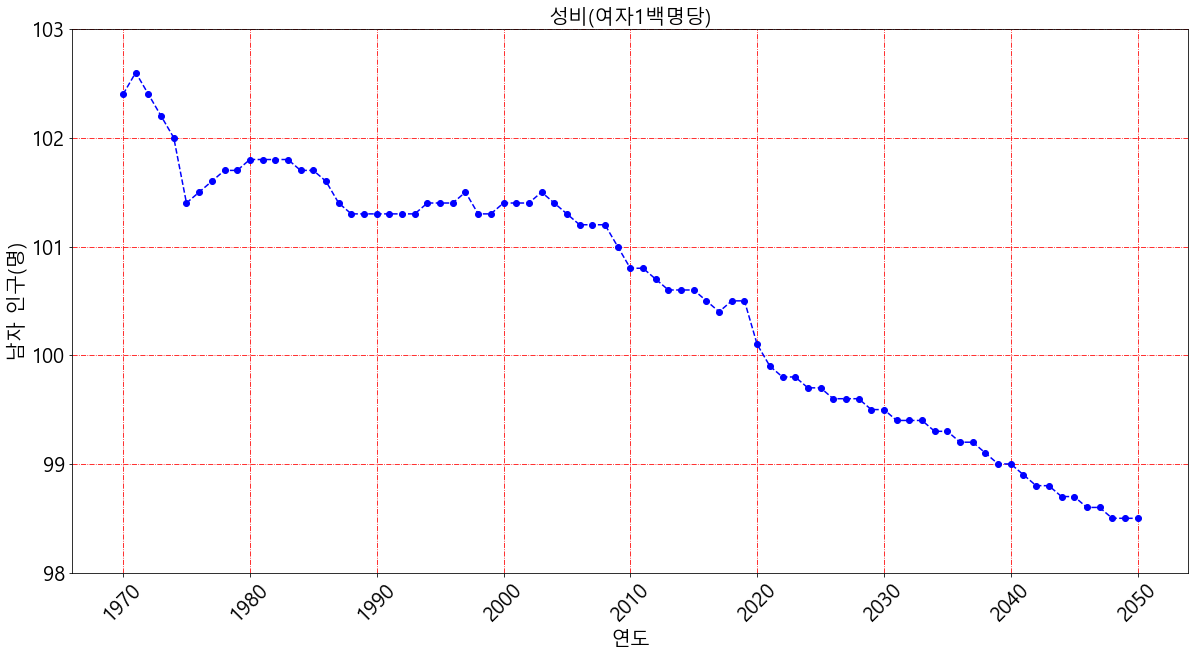

In [14]:
#102 성비(여자1백명당)
str = '성비(여자1백명당)'
df102_i.loc[str]

df102_i.loc[str].plot(kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='--', color='blue')

plt.grid(True, axis='x', color='red', linestyle='-.')
plt.grid(True, axis='y', color='red', linestyle='-.')
plt.title(str, size=20)
plt.ylabel('남자 인구(명)', size=20)
plt.xlabel('연도', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.ylim(98, 103)

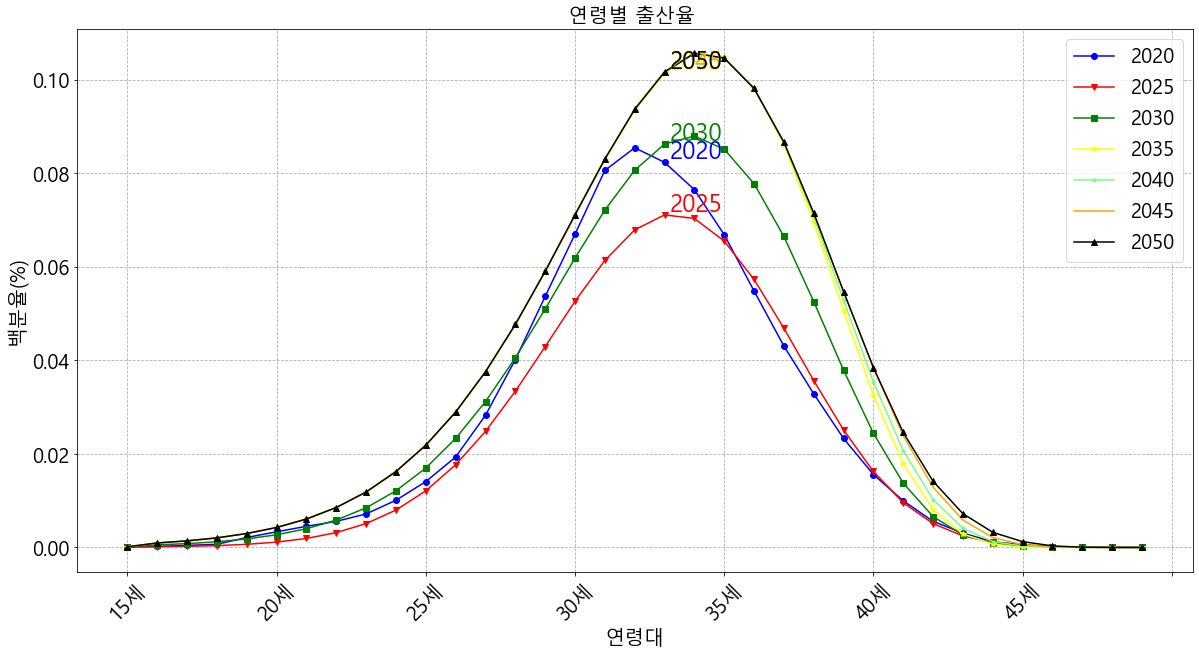

In [15]:
#106 연령별 출산율 2D
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

df106_i2.iloc[:,0].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = 'o', linestyle='-', color='blue')
df106_i2.iloc[:,5].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = 'v', linestyle='-', color='red')
df106_i2.iloc[:,10].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = 's', linestyle='-', color='green')
df106_i2.iloc[:,15].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = '*', linestyle='-', color='yellow')
df106_i2.iloc[:,20].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = '.', linestyle='-', color='#77ff77')
df106_i2.iloc[:,25].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = ',', linestyle='-', color='orange')
df106_i2.iloc[:,30].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                       marker = '^', linestyle='-', color='black')

improve_legend(axes, -17, -17)
plt.title('연령별 출산율 ', size=20)
plt.ylabel('백분율(%)', size=20)
plt.xlabel('연령대', size=20)
plt.legend(loc='best', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.grid(True, linestyle='--')
# fig.suptitle('전체 제목', fontsize=20)

In [16]:
#106 연령별 출산율 3D
z = df106_i2
z = df106_i2.sort_index(ascending=False)
y= z.index
x = df106_i2.columns
t = np.linspace(0, 10, 50)
fig= go.Figure(data=[go.Surface(x=x, y=y, z=z.values)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
   title='연령별 출산율', autosize=False,
   width=600,height=600,
   scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
   scene = {
      "xaxis": {"nticks": 11},
      "yaxis": {"nticks": 10},
      "zaxis": {"nticks": 10},
   },   
   updatemenus=[dict(type='buttons', showactive=False, y=1,x=0.8,
      xanchor='left', yanchor='bottom',
      pad=dict(t=45, r=10),
      buttons=[dict(label='Play',method='animate',
         args=[None, dict(frame=dict(duration=200, redraw=True), 
            transition=dict(duration=0), fromcurrent=True, mode='immediate')])])]
)

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames

fig.show()

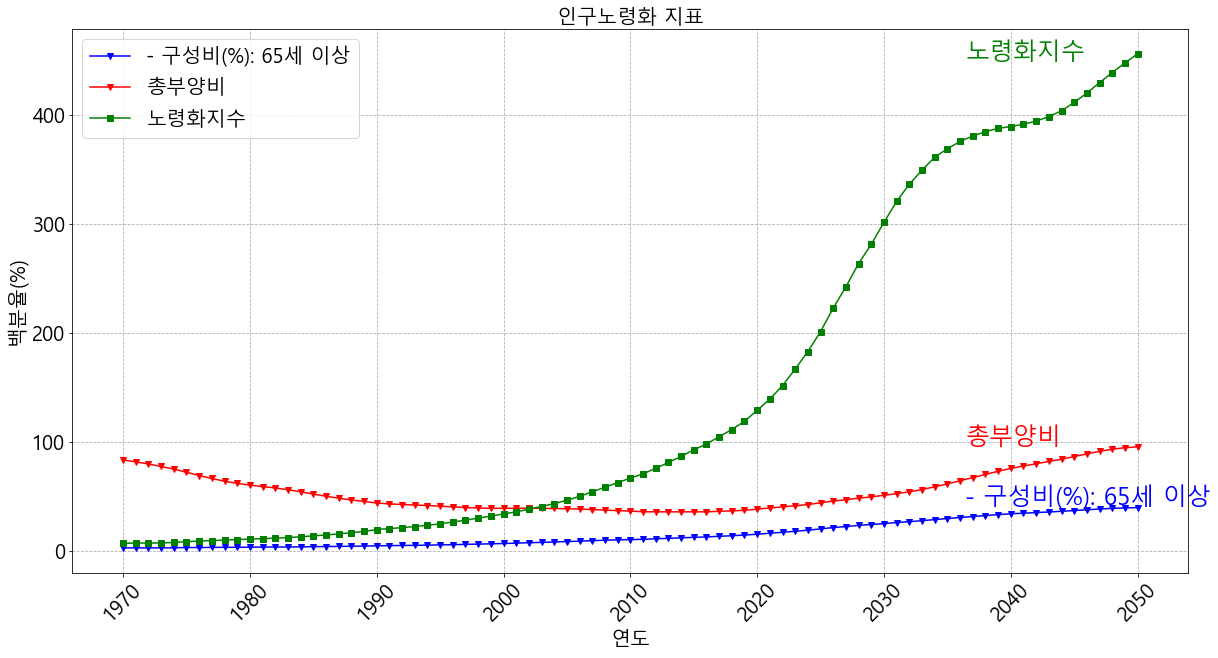

In [17]:
# 000 인구노령화
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

str1 = '- 구성비(%): 65세 이상'
df102_i.loc[str1]
df102_i.loc[str1].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 'v', linestyle='-', color='blue')
str2 = '총부양비'
df102_i.loc[str2]
df102_i.loc[str2].plot(kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 'v', linestyle='-', color='red')
str3 = '노령화지수'
df102_i.loc[str3]
df102_i.loc[str3].plot(kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 's', linestyle='-', color='green')
improve_legend(axes, -15, -2)
plt.title('인구노령화 지표', size=20)
plt.ylabel('백분율(%)', size=20)
plt.xlabel('연도', size=20)
plt.legend(loc='best', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.grid(True, linestyle='--')
# fig.suptitle('전체 제목', fontsize=20)

(15000.0, 40000.0)

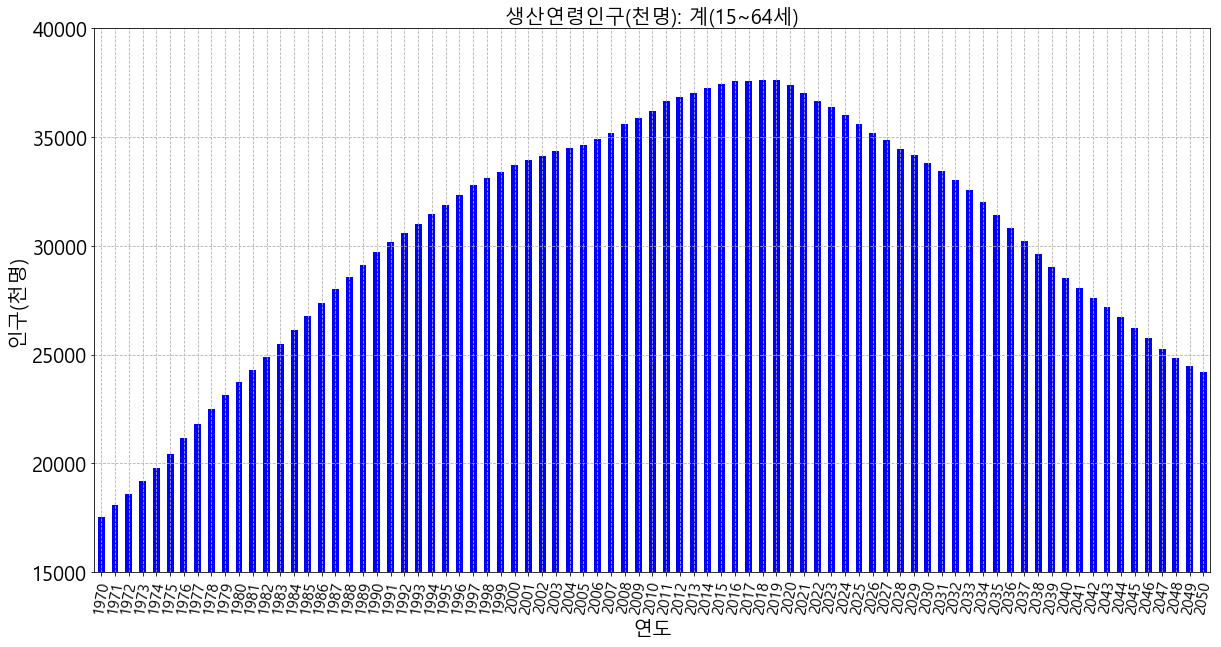

In [18]:
#103 생산연령인구(천명): 계(15~64세)
str = '생산연령인구(천명): 계(15~64세)'
df103_i.loc[str]

df103_i.loc[str].plot(kind='bar', stacked=False, alpha=1.0, figsize=(20,10),
                                color='blue')

plt.title(str, size=20)
plt.ylabel('인구(천명)', size=20)
plt.xlabel('연도', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15, rotation = 80)
plt.grid(True, linestyle='--')
plt.ylim(15000, 40000)

(900.0, 4000.0)

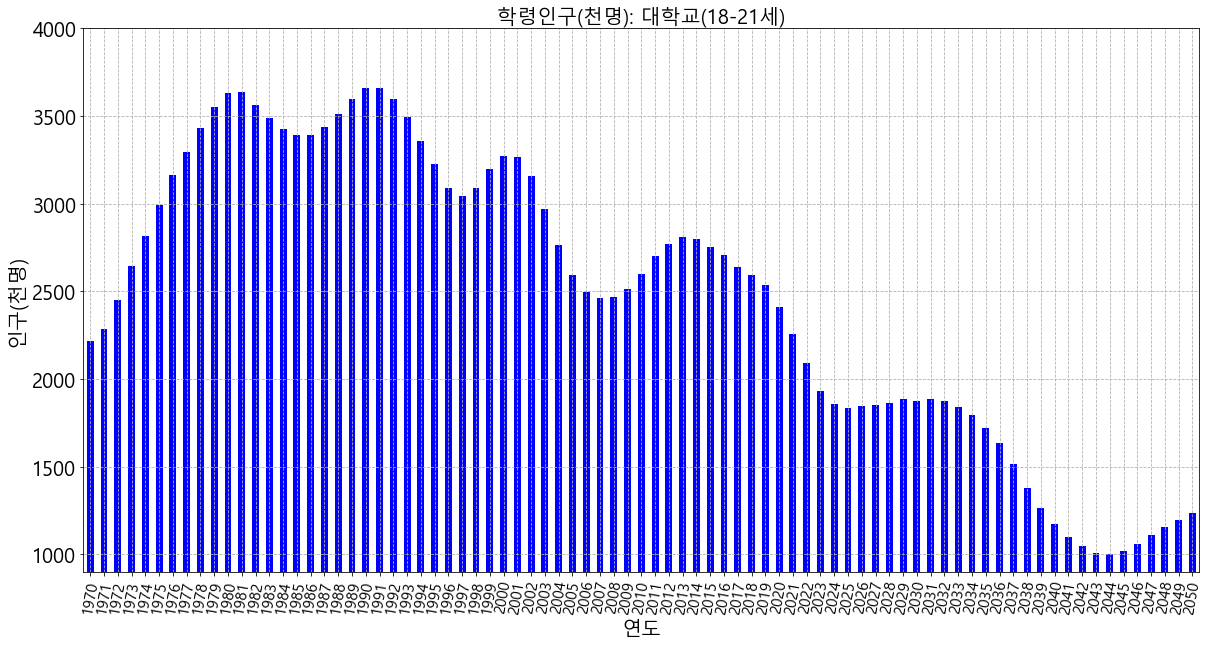

In [19]:
#103 학령인구(천명): 대학교(18-21세)
str = '학령인구(천명): 대학교(18-21세)'
df103_i.loc[str]

df103_i.loc[str].plot(kind='bar', stacked=False, alpha=1.0, figsize=(20,10),
                                color='blue')

plt.title(str, size=20)
plt.ylabel('인구(천명)', size=20)
plt.xlabel('연도', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15, rotation = 80)
plt.grid(True, linestyle='--')
plt.ylim(900, 4000)

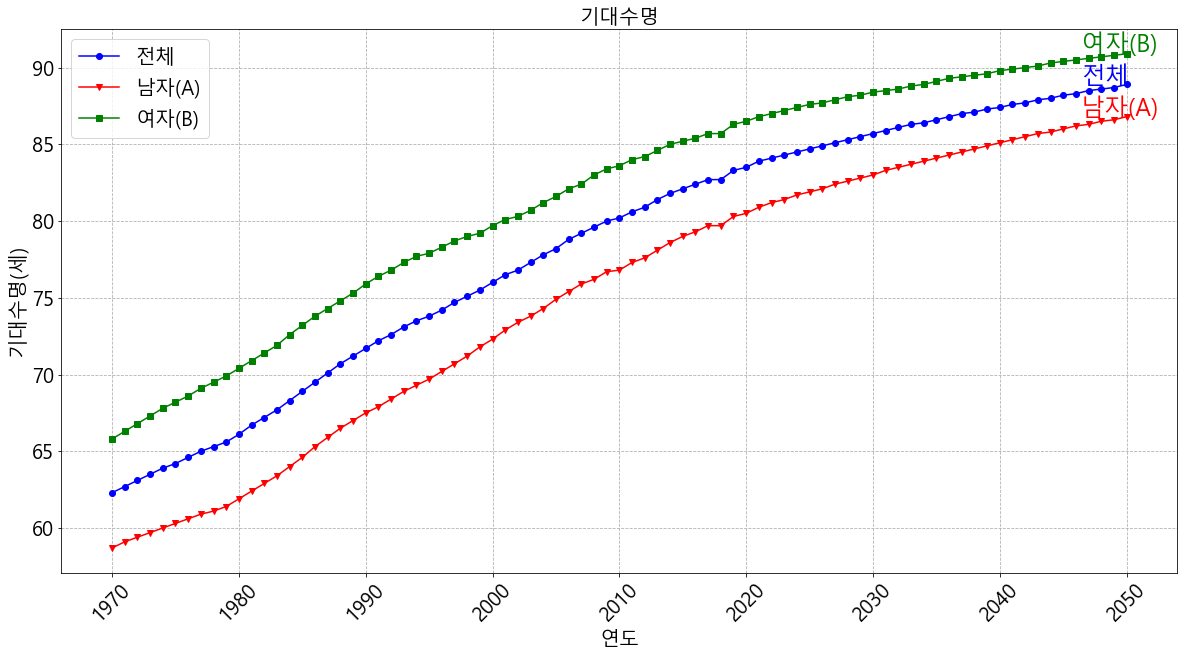

In [20]:
#107 기대수명
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

df107_i.loc['전체'].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 'o', linestyle='-', color='blue')
df107_i.loc['남자(A)'].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 'v', linestyle='-', color='red')
df107_i.loc['여자(B)'].plot(ax=axes, kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                        marker = 's', linestyle='-', color='green')
improve_legend(axes, -5, -2)                        
plt.title('기대수명', size=20)
plt.ylabel('기대수명(세)', size=20)
plt.xlabel('연도', size=20)
plt.legend(loc='best', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
plt.grid(True, linestyle='--')
# fig.suptitle('전체 제목', fontsize=20)

In [21]:
#201: 지방
df201_i2 = df201_i[:]
df201_i2.columns = df201_i.iloc[0, :]
df201_i2.drop(0, inplace=True)
df201_i2 = df201_i2.reset_index()
df201_i2.drop('index', axis=1, inplace=True)
df201_i2.info

<ipython-input-21-c0e413a47f36>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method DataFrame.info of 0         시도별  성별       연령별    항목   단위    1970 년    1971 년    1972 년  \
0          전국   계         계  추계인구  NaN  32240827  32882704  33505406   
1          전국   계    0 - 4세  추계인구  NaN   4548177   4619581   4675505   
2          전국   계    5 - 9세  추계인구  NaN   4629882   4524871   4457446   
3          전국   계  10 - 14세  추계인구  NaN   4531308   4619637   4725521   
4          전국   계  15 - 19세  추계인구  NaN   3269356   3499916   3723447   
...       ...  ..       ...   ...  ...       ...       ...       ...   
1237  제주특별자치도  여자  80 - 84세  추계인구  NaN       NaN       NaN       NaN   
1238  제주특별자치도  여자  85 - 89세  추계인구  NaN       NaN       NaN       NaN   
1239  제주특별자치도  여자  90 - 94세  추계인구  NaN       NaN       NaN       NaN   
1240  제주특별자치도  여자  95 - 99세  추계인구  NaN       NaN       NaN       NaN   
1241  제주특별자치도  여자   100세 이상  추계인구  NaN       NaN       NaN       NaN   

0       1973 년    1974 년  ...    2041 년    2042 년    2043 년    2044 년  \
0     34103149  34692266  ... 

In [22]:
# 시도별 인구 총계 행 찾기 - filtering
for i in range(len(df201_i2)-1, 0, -1):
   if df201_i2.iloc[i,1] != '계' or df201_i2.iloc[i,2] != '계':
      df201_i2.drop(i, inplace=True)

df201_i2 = df201_i2.reset_index()
df201_i2.drop('index', axis=1, inplace=True)
df201_i2.set_index('시도별', inplace=True)

In [23]:
# 
df201_i2

,성별,연령별,항목,단위,1970 년,1971 년,1972 년,1973 년,1974 년,1975 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
시도별,,,,,,,,,,,,,,,,,,,,,
전국,계,계,추계인구,NaN,32240827,32882704,33505406,34103149,34692266,35280725,...,49998451,49784159,49551362,49300187,49029906,48739019,48426874,48093212,47737283,47358532
서울특별시,계,계,추계인구,NaN,5685932,5940442,6206625,6470497,6737832,7005007,...,8490967,8439075,8383996,8325708,8264297,8200122,8133266,8063976,7992431,7918861
부산광역시,계,계,추계인구,NaN,2045828,2155433,2270494,2386209,2504899,2625143,...,2797745,2767780,2737196,2706139,2674673,2642885,2610769,2578318,2545489,2512270
대구광역시,계,계,추계인구,NaN,1294646,1344660,1395645,1445274,1494654,1543540,...,2000720,1980713,1960332,1939618,1918556,1897143,1875355,1853121,1830372,1807068
인천광역시,계,계,추계인구,NaN,803730,838028,873538,909047,945093,981336,...,2939673,2930778,2920648,2909353,2896848,2882996,2867823,2851260,2833257,2813782
광주광역시,계,계,추계인구,NaN,651380,672432,693417,713346,732636,751007,...,1313595,1303734,1293613,1283155,1272392,1261321,1249845,1237990,1225753,1213098
대전광역시,계,계,추계인구,NaN,548414,569050,590072,610596,630981,650941,...,1331777,1324001,1315830,1307221,1298189,1288727,1278833,1268538,1257871,1246836
울산광역시,계,계,추계인구,NaN,282596,299698,317409,335799,355047,374958,...,944042,933938,923662,913176,902461,891460,880114,868471,856526,844246
세종특별자치시,계,계,추계인구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,591076,596840,602324,607514,612399,616949,621104,624819,628055,630780


Text(0.5, 0.98, '지방 인구추계')

d:\_dev\Python\lib\site-packages\matplotlib\text.py:1421: UserWarning:




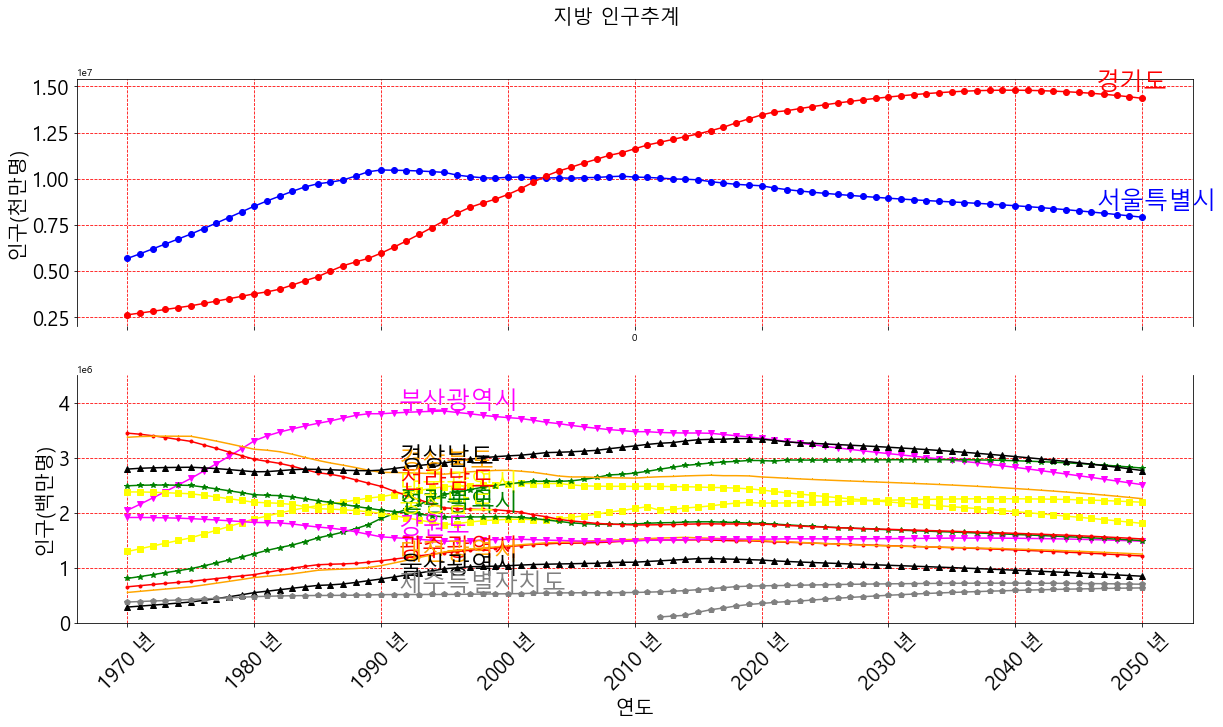

In [24]:
# 지방 인구추계
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))

df201_i2.iloc[ 1, 4:].plot(ax=axes[0], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'o', linestyle='-', color='blue')
df201_i2.iloc[ 2, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'v', linestyle='-', color='#ff00ff')
df201_i2.iloc[ 3, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 's', linestyle='-', color='yellow')
df201_i2.iloc[ 4, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '*', linestyle='-', color='green')
df201_i2.iloc[ 5, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '.', linestyle='-', color='red')
df201_i2.iloc[ 6, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = ',', linestyle='-', color='orange')
df201_i2.iloc[ 7, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '^', linestyle='-', color='black')
df201_i2.iloc[ 8, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'p', linestyle='-', color='gray')
df201_i2.iloc[ 9, 4:].plot(ax=axes[0], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'o', linestyle='-', color='red')
df201_i2.iloc[10, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'v', linestyle='-', color='#ff00ff')
df201_i2.iloc[12, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 's', linestyle='-', color='yellow')
df201_i2.iloc[13, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '*', linestyle='-', color='green')
df201_i2.iloc[14, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '.', linestyle='-', color='red')
df201_i2.iloc[15, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = ',', linestyle='-', color='orange')
df201_i2.iloc[16, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = '^', linestyle='-', color='black')
df201_i2.iloc[17, 4:].plot(ax=axes[1], kind='line', stacked=False, alpha=1.0, figsize=(20,10), marker = 'p', linestyle='-', color='gray')

improve_legend(axes[0], -5, -5)
improve_legend(axes[1], -60, -60)
axes[0].grid(True, axis='x', color='red', linestyle='--')
axes[0].grid(True, axis='y', color='red', linestyle='--')
axes[0].set_ylabel('인구(천만명)', size=20)
axes[0].tick_params(axis='x', which='major', labelsize=20, rotation = 45, labelbottom=False)
axes[0].tick_params(axis='y', which='major', labelsize=20)
axes[0].spines['bottom'].set_visible(False)
axes[1].grid(True, axis='x', color='red', linestyle='--')
axes[1].grid(True, axis='y', color='red', linestyle='--')
axes[1].set_ylabel('인구(백만명)', size=20)
axes[1].set_xlabel('연도', size=20)
axes[1].tick_params(axis='x', which='major', labelsize=20, rotation = 45)
axes[1].tick_params(axis='y', which='major', labelsize=20)
axes[1].set_ylim(0, 4500000)
axes[1].spines['top'].set_visible(False)

fig.suptitle('지방 인구추계', fontsize=20)

In [25]:
#save as a excel file
# df201_i2.to_excel("./data/df201_i2.xlsx")